In [1]:
import pandas as pd
import numpy as np

# Data loading

In [2]:
data = pd.read_csv("../data/raw/ml-100k/u.data", sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
data

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
GENRES = ["unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", 
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
OCCUPATIONS = ["administrator", "artist", "doctor", "educator", "engineer", "entertainment", "executive", "healthcare", "homemaker", "lawyer", 
               "librarian" ,"marketing" ,"none" ,"other" ,"programmer" ,"retired" ,"salesman" ,"scientist" ,"student" ,"technician" ,"writer"]

In [4]:
items = pd.read_csv("../data/raw/ml-100k/u.item", sep='|', header=None, names=["movie_id", "movie_title", "release_date", "video_release_date",
              "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", 
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"], encoding='ISO-8859-1')
items

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
items = items.drop(columns=['video_release_date'])
items

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
items.shape

(1682, 23)

In [7]:
users = pd.read_csv("../data/raw/ml-100k/u.user", sep='|', header=None, names=["user_id", "age", "gender", "occupation", "zip_code"], encoding='ISO-8859-1')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# EDA

<Axes: xlabel='rating'>

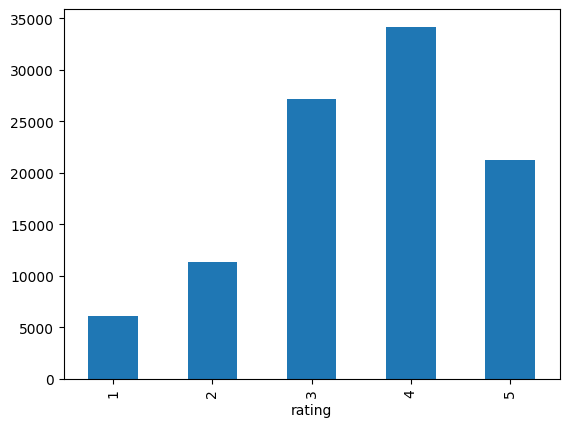

In [8]:
import matplotlib as plot
data['rating'].value_counts().sort_index().plot.bar()

# Data preprocessing

In [9]:
import ctypes

def my_hash(x):
  return ctypes.c_size_t(hash(x)).value

def users_encode(users):
  users_enc = users.copy()
  users_enc["age"] = users['age']/100
  users_enc["gender"] = (users['gender']=='M').astype(int)
  users_enc["zip_code"] = users["zip_code"].apply(my_hash)
  max_zip = users_enc["zip_code"].max()
  users_enc["zip_code"] = users_enc["zip_code"]/max_zip
  users_enc["occupation"] = users["occupation"].apply(OCCUPATIONS.index)/len(OCCUPATIONS)
  return users_enc


def calculate_genre_ratio(user_id, data, items):
  movies_set = set(data[data["user_id"] == user_id]["movie_id"].tolist())
  genres_sum = items[items["movie_id"].isin(movies_set)].iloc[:, 4:].sum(axis=0).to_numpy()
  return genres_sum/genres_sum.sum()

def encode_users(users, data, items):
  users_enc = users_encode(users)
  users_enc[[name for name in GENRES]] = users_enc["user_id"].apply(lambda x: calculate_genre_ratio(x, data, items)).tolist()
  return users_enc

In [10]:
dataset = encode_users(users, data, items)
dataset.head()

,user_id,age,gender,occupation,zip_code,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.24,1,0.904762,0.312313,0.001704,0.127768,0.071550,0.020443,0.042589,...,0.003407,0.001704,0.022147,0.022147,0.008518,0.074957,0.073254,0.088586,0.042589,0.010221
1,2,0.53,0,0.619048,0.836869,0.000000,0.081301,0.024390,0.008130,0.032520,...,0.008130,0.016260,0.016260,0.008130,0.032520,0.130081,0.032520,0.097561,0.024390,0.000000
2,3,0.23,1,0.952381,0.652567,0.000000,0.114754,0.032787,0.000000,0.000000,...,0.000000,0.016393,0.040984,0.016393,0.090164,0.040984,0.065574,0.172131,0.040984,0.000000
3,4,0.24,1,0.904762,0.254775,0.000000,0.142857,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.017857,0.017857,0.089286,0.053571,0.107143,0.196429,0.035714,0.000000
4,5,0.33,0,0.619048,0.476869,0.002604,0.145833,0.085938,0.036458,0.075521,...,0.005208,0.002604,0.072917,0.031250,0.007812,0.049479,0.085938,0.049479,0.036458,0.005208


In [11]:
dataset.shape

(943, 24)

In [12]:
users_with_films = users
users_with_films

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [13]:
data.groupby('user_id')['movie_id'].apply(list).reset_index(name = 'listvalues') 

,user_id,listvalues
0,1,"[61, 189, 33, 160, 20, 202, 171, 265, 155, 117..."
1,2,"[292, 251, 50, 314, 297, 290, 312, 281, 13, 28..."
2,3,"[335, 245, 337, 343, 323, 331, 294, 332, 328, ..."
3,4,"[264, 303, 361, 357, 260, 356, 294, 288, 50, 3..."
4,5,"[2, 17, 439, 225, 110, 454, 424, 1, 363, 98, 1..."
...,...,...
938,939,"[931, 106, 258, 1054, 689, 476, 409, 121, 1190..."
939,940,"[193, 568, 14, 205, 272, 655, 315, 66, 873, 28..."
940,941,"[147, 124, 117, 181, 993, 258, 7, 475, 257, 15..."
941,942,"[117, 200, 604, 423, 261, 427, 487, 323, 615, ..."


In [14]:
temp_data = data[['user_id', "rating", "movie_id"]]
temp_data

,user_id,rating,movie_id
0,196,3,242
1,186,3,302
2,22,1,377
3,244,2,51
4,166,1,346
...,...,...,...
99995,880,3,476
99996,716,5,204
99997,276,1,1090
99998,13,2,225


In [15]:
data.set_index('movie_id').groupby('user_id')['rating'].nlargest(5).reset_index()#.groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movie_ids')

,user_id,movie_id,rating
0,1,202,5
1,1,171,5
2,1,253,5
3,1,113,5
4,1,64,5
...,...,...,...
4710,943,186,5
4711,943,215,5
4712,943,12,5
4713,943,471,5


In [16]:
data[(data["user_id"]==940) & (data["movie_id"]==96)]

,user_id,movie_id,rating,timestamp
68631,940,96,5,885921265


In [17]:
def encode_top_films(user_id, top_films):
  arr = top_films[top_films['user_id']==user_id]["movie_ids"].item()
  # print(arr.item())
  arr = [x/1682 for x in arr]
  return arr

def get_users_fav_films(users, data, n):
  users = users.copy()
  top_films = data.set_index('movie_id').groupby('user_id')['rating'].nlargest(n).reset_index().groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movie_ids')
  users[[f"top_{name+1}" for name in range(n)]] = users["user_id"].apply(lambda x: encode_top_films(x, top_films)).tolist()
  return users

In [18]:
new_dataset = get_users_fav_films(dataset, data, 5)
new_dataset

,user_id,age,gender,occupation,zip_code,unknown,Action,Adventure,Animation,Children's,...,Romance,Sci-Fi,Thriller,War,Western,top_1,top_2,top_3,top_4,top_5
0,1,0.24,1,0.904762,0.312313,0.001704,0.127768,0.071550,0.020443,0.042589,...,0.074957,0.073254,0.088586,0.042589,0.010221,0.120095,0.101665,0.150416,0.067182,0.038050
1,2,0.53,0,0.619048,0.836869,0.000000,0.081301,0.024390,0.008130,0.032520,...,0.130081,0.032520,0.097561,0.024390,0.000000,0.149227,0.029727,0.187872,0.186088,0.143876
2,3,0.23,1,0.952381,0.652567,0.000000,0.114754,0.032787,0.000000,0.000000,...,0.040984,0.065574,0.172131,0.040984,0.000000,0.195006,0.190844,0.190250,0.206302,0.202140
3,4,0.24,1,0.904762,0.254775,0.000000,0.142857,0.071429,0.000000,0.000000,...,0.053571,0.107143,0.196429,0.035714,0.000000,0.180143,0.214625,0.174792,0.029727,0.210464
4,5,0.33,0,0.619048,0.476869,0.002604,0.145833,0.085938,0.036458,0.075521,...,0.049479,0.085938,0.049479,0.036458,0.005208,0.227111,0.259215,0.024970,0.090963,0.064804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,0.26,0,0.857143,0.773417,0.000000,0.174757,0.097087,0.009709,0.009709,...,0.097087,0.077670,0.116505,0.029126,0.000000,0.409631,0.282996,0.071938,0.707491,0.131986
939,940,0.32,1,0.000000,0.368850,0.000000,0.098291,0.051282,0.008547,0.021368,...,0.102564,0.081197,0.085470,0.064103,0.000000,0.057075,0.115339,0.004756,0.033294,0.056480
940,941,0.20,1,0.857143,0.264784,0.000000,0.185185,0.129630,0.055556,0.037037,...,0.018519,0.148148,0.129630,0.018519,0.000000,0.073722,0.069560,0.107610,0.177170,0.242568
941,942,0.48,0,0.476190,0.789052,0.000000,0.102857,0.062857,0.022857,0.074286,...,0.097143,0.034286,0.114286,0.057143,0.017143,0.251486,0.253864,0.206302,0.180737,0.114744


In [19]:
data.groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movies') 

,user_id,movies
0,1,"[61, 189, 33, 160, 20, 202, 171, 265, 155, 117..."
1,2,"[292, 251, 50, 314, 297, 290, 312, 281, 13, 28..."
2,3,"[335, 245, 337, 343, 323, 331, 294, 332, 328, ..."
3,4,"[264, 303, 361, 357, 260, 356, 294, 288, 50, 3..."
4,5,"[2, 17, 439, 225, 110, 454, 424, 1, 363, 98, 1..."
...,...,...
938,939,"[931, 106, 258, 1054, 689, 476, 409, 121, 1190..."
939,940,"[193, 568, 14, 205, 272, 655, 315, 66, 873, 28..."
940,941,"[147, 124, 117, 181, 993, 258, 7, 475, 257, 15..."
941,942,"[117, 200, 604, 423, 261, 427, 487, 323, 615, ..."


In [20]:
data.groupby('user_id')['rating'].apply(list).reset_index(name = 'ratings') 

,user_id,ratings
0,1,"[4, 3, 4, 4, 4, 5, 5, 4, 2, 3, 4, 4, 5, 5, 4, ..."
1,2,"[4, 5, 5, 1, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 5, ..."
2,3,"[1, 1, 1, 3, 2, 4, 2, 1, 5, 3, 3, 1, 4, 2, 3, ..."
3,4,"[3, 5, 5, 4, 4, 3, 5, 4, 5, 5, 4, 5, 3, 5, 3, ..."
4,5,"[3, 4, 1, 2, 1, 1, 1, 4, 3, 3, 3, 4, 5, 2, 4, ..."
...,...,...
938,939,"[2, 3, 4, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 3, 2, ..."
939,940,"[3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 5, 5, 4, 3, 5, ..."
940,941,"[4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 2, 2, 3, 5, ..."
941,942,"[4, 4, 4, 5, 4, 5, 4, 3, 3, 4, 5, 3, 3, 2, 4, ..."


In [21]:
len(data.groupby('user_id')['rating'].apply(list).reset_index(name = 'ratings').iloc[0]['ratings'])

272

In [22]:
len(data.groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movies').iloc[0]['movies'])

272

In [23]:
import warnings
warnings.filterwarnings("ignore")

def build_target(data):
    target = data.groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movies') 
    for i in range(1682):
        target[f"{i+1}"] = 0
    
    for i, row in target.iterrows():
        for elem in row['movies']:
            target.at[i, f"{elem}"] = 1
    return target

In [24]:
target = build_target(data)
target

,user_id,movies,1,2,3,4,5,6,7,8,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,1,"[61, 189, 33, 160, 20, 202, 171, 265, 155, 117...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,"[292, 251, 50, 314, 297, 290, 312, 281, 13, 28...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,"[335, 245, 337, 343, 323, 331, 294, 332, 328, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"[264, 303, 361, 357, 260, 356, 294, 288, 50, 3...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,"[2, 17, 439, 225, 110, 454, 424, 1, 363, 98, 1...",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,"[931, 106, 258, 1054, 689, 476, 409, 121, 1190...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
939,940,"[193, 568, 14, 205, 272, 655, 315, 66, 873, 28...",0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
940,941,"[147, 124, 117, 181, 993, 258, 7, 475, 257, 15...",1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
941,942,"[117, 200, 604, 423, 261, 427, 487, 323, 615, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
target_prep = target.drop(columns=["user_id", "movies"])
target_prep

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
939,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
940,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# def get_users_fav_films(users, data, n):
#   users = users.copy()
#   top_films = data.set_index('movie_id').groupby('user_id')['rating'].nlargest(n).reset_index().groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movie_ids')
#   print(set(top_films['user_id']))
#   print(set(users['user_id']))
#   users[[f"top_{name+1}" for name in range(n)]] = users["user_id"].apply(lambda x: encode_top_films(x, top_films)).tolist()
#   return users

In [27]:
# data_test = pd.read_csv("../data/raw/ml-100k/u1.test", sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
# dataset = encode_users(users, data_test, items)
# final_dataset = get_users_fav_films(dataset, data_test, 1)

In [139]:
def build_dataset(users, items, data):
    dataset = encode_users(users, data, items)
    final_dataset = get_users_fav_films(dataset, data, 5)
    final_dataset = final_dataset.drop(columns=["user_id"])
    target = build_target(data)
    final_target = target.drop(columns=["user_id", "movies"])
    return final_dataset, final_target, target['movies'].to_list()

data = pd.read_csv("../data/raw/ml-100k/u.data", sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
# data_test = pd.read_csv("../data/raw/ml-100k/ua.test", sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# train_dataset, train_targets, train_lists = build_dataset(users, items, data_train)
# test_dataset, test_targets, test_lists = build_dataset(users, items, data_test)
dataset, targets, idx_lists = build_dataset(users, items, data)

In [140]:
TRAIN_RATIO = 0.6

train_dataset = dataset.sample(frac=TRAIN_RATIO, random_state=177013)
test_dataset = dataset.drop(train_dataset.index)
train_targets = targets.sample(frac=TRAIN_RATIO, random_state=177013)
test_targets = targets.drop(train_targets.index)

print(f"{len(train_dataset)=}")
print(f"{len(test_dataset)=}")

len(train_dataset)=566
len(test_dataset)=377


# Model

In [141]:
import torch

In [142]:
device = "cuda"  if torch.cuda.is_available() else 'cpu'

In [143]:
X_train = torch.Tensor(train_dataset.values).to(device)
Y_train = torch.Tensor(train_targets.values).to(device)
X_test = torch.Tensor(test_dataset.values).to(device)
Y_test = torch.Tensor(test_targets.values).to(device)

In [145]:
from torch import nn 
import torch.nn.functional as F

class WideAndDeep(nn.Module):
    def __init__(
        self
    ):
        super(WideAndDeep, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU()
        )
        self.head = nn.Sequential(
            nn.Linear(2048, 1682)
        )

    def forward(self, x):
        deep_logits = self.linear_relu_stack(x)
        total_logits = self.head(deep_logits)
        return F.sigmoid(total_logits)

In [153]:
model = WideAndDeep().to(device)

In [154]:
EPOCHS = 500
loss_fn = nn.BCELoss()#nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
best_score = 999999

for t in range(EPOCHS):
    model.train()
    pred_train = model(X_train)
    loss_train = loss_fn(pred_train, Y_train)
    
    # Backpropagation
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    predictions = pred_train
    predictions[predictions >= 0.9] = 1.0
    predictions[predictions < 0.9] = 0.0

    correct = 0
    total = 0
    for i in range(len(Y_train)):
        correct += (predictions[i] == Y_train[i]).sum().item()
        total +=  len(Y_train[i])

    model.eval()
    with torch.no_grad():
        pred_test = model(X_test)
        loss_test = loss_fn(pred_test, Y_test)
        if loss_test < best_score:
            best_score = loss_test
            torch.save(model, "../models/best_model")
    
    print(f"Epoch {t}")
    # print(correct/total)
    print(f"Train loss: {loss_train:>7f}")
    print(f"Test loss: {loss_test:>7f}")

Epoch 0
Train loss: 0.693530
Test loss: 0.669449
Epoch 1
Train loss: 0.669389
Test loss: 0.609881
Epoch 2
Train loss: 0.609687
Test loss: 0.491725
Epoch 3
Train loss: 0.491412
Test loss: 0.333885
Epoch 4
Train loss: 0.334206
Test loss: 0.229029
Epoch 5
Train loss: 0.231963
Test loss: 0.239311
Epoch 6
Train loss: 0.246008
Test loss: 0.270330
Epoch 7
Train loss: 0.279785
Test loss: 0.270533
Epoch 8
Train loss: 0.281307
Test loss: 0.249243
Epoch 9
Train loss: 0.260080
Test loss: 0.225021
Epoch 10
Train loss: 0.235057
Test loss: 0.210485
Epoch 11
Train loss: 0.219252
Test loss: 0.207356
Epoch 12
Train loss: 0.214717
Test loss: 0.210327
Epoch 13
Train loss: 0.216382
Test loss: 0.214226
Epoch 14
Train loss: 0.219200
Test loss: 0.216191
Epoch 15
Train loss: 0.220365
Test loss: 0.215056
Epoch 16
Train loss: 0.218714
Test loss: 0.210762
Epoch 17
Train loss: 0.214164
Test loss: 0.204149
Epoch 18
Train loss: 0.207522
Test loss: 0.196842
Epoch 19
Train loss: 0.200378
Test loss: 0.190951
Epoch 20
T

In [155]:
from torcheval.metrics.functional.ranking import retrieval_precision
K = 10

model = torch.load("../models/best_model").to(device)
precisions = []
ranks = []
actuals = []
predictions = []
for i in range(len(Y_test)):
    probs = model(X_test[i])
    prec = retrieval_precision(probs, Y_test[i], K).item()
    precisions.append(prec)
    temp = probs.detach().cpu().numpy()
    act = Y_test[i].detach().cpu().numpy()
    actuals.append(np.argsort(act)[len(act)-int(sum(act)):])
    predictions.append(np.argsort(temp)[::-1])
print(f"mean: {np.mean(precisions)}")
print(f"min: {np.min(precisions)}")
print(f"max: {np.max(precisions)}")

mean: 0.6307692396348288
min: 0.0
max: 1.0


In [156]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.

    This function computes the average prescision at k between two lists of
    items.

    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The average precision at k over the input lists

    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    # if not actual:
    #     return 0.0
    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.

    This function computes the mean average prescision at k between two lists
    of lists of items.

    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The mean average precision at k over the input lists

    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [160]:
mapk(actuals, predictions, 1)

0.7904509283819628

In [50]:
temp = model(X_test[10]).detach().cpu().numpy()

In [67]:
np.argsort(temp)

array([1666, 1669, 1674, ...,   99,  257,   49], dtype=int64)

In [78]:
act = Y_test[10].detach().cpu().numpy()

In [79]:
sum(act)

86.0

In [91]:
act[251]

1.0

In [98]:
np.argsort(act)[len(act)-int(sum(act)):]

array([  14,   32,    6,   10,   24,   55,   11,   49,  422,   97, 1056,
       1058,  596,  595,  587, 1094,  545, 1164,  474,  420,  410,  409,
        405,  404,  367,  627, 1046, 1015, 1013,  828,  788,  885,  894,
        771,  762,  757,  357,  750,  927,  742,  741,  930,  976,  677,
       1011,  747,   95,  337,  306,  173,  172,  171,  167,  163,  155,
        150,  149,  143,  142,  131,  121,  120,  116,  108,  175,  178,
        180,  183,  297,  287,  281,  270,  267,  264,  257,  312,  256,
        248,  239,  236,  221,  213,  209,  194,  251,    0], dtype=int64)

In [86]:
act[0]

1.0

In [51]:
len(temp)

1682

In [100]:
apk(np.argsort(act)[len(act)-int(sum(act)):], np.argsort(temp)[::-1], 10)

6.0


0.4841666666666667

In [188]:
probs = temp#.detach().cpu().numpy()

In [144]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

# for i in find_indices(Y_train[10].detach().cpu().tolist(), 1):
#     probs[i] = 0

In [190]:
retrieval_precision(probs, Y_test[10], 20)

tensor(0.7000, device='cuda:0')

In [ ]:
probs[10:324]

array([0.        , 0.        , 0.48415384, 0.4817772 , 0.        ,
       0.4744662 , 0.485048  , 0.4460956 , 0.48696798, 0.47149345,
       0.48264754, 0.        , 0.4900666 , 0.        , 0.        ,
       0.48090187, 0.47338694, 0.        , 0.        , 0.47268552,
       0.49440783, 0.48571146, 0.48151734, 0.4347631 , 0.4529387 ,
       0.45358804, 0.44153446, 0.48433843, 0.        , 0.        ,
       0.46255854, 0.        , 0.47495168, 0.47664148, 0.48347062,
       0.47274363, 0.        , 0.48802766, 0.48119715, 0.5071333 ,
       0.        , 0.        , 0.47454464, 0.        , 0.487553  ,
       0.        , 0.        , 0.        , 0.48211876, 0.48885095,
       0.47428197, 0.48764026, 0.47709072, 0.4916433 , 0.4845622 ,
       0.4843559 , 0.48558494, 0.4894261 , 0.        , 0.        ,
       0.48481014, 0.4797621 , 0.4918702 , 0.43535787, 0.43206778,
       0.48120272, 0.49404365, 0.47092035, 0.        , 0.4773055 ,
       0.47775546, 0.4880622 , 0.        , 0.4585773 , 0.48213

In [ ]:
def sort_args(x, n):
  return np.argsort(-x)[:n]

def top_intersection(target, predicted, top_n = 20):
  return list(set(sort_args(target, top_n)).intersection(sort_args(predicted, top_n)))

sort_args(probs, 10)

array([ 49, 180, 182, 173, 234,   6, 293, 288, 587, 209], dtype=int64)

In [ ]:
sort_args(Y_test[10], 10)

array([424, 724, 557, 226,  37, 731, 722, 109, 110, 739], dtype=int64)

In [ ]:
test_lists[10]

[38, 110, 111, 227, 425, 558, 723, 725, 732, 740]

In [ ]:
probs.argsort()[:10]

array([525, 729, 119, 120, 426, 122, 290, 124, 289, 730], dtype=int64)

In [ ]:
top_intersection(Y_test[10], probs, 10)

[]

In [ ]:
target['813']

0      0
1      0
2      0
3      0
4      0
      ..
938    0
939    0
940    0
941    0
942    0
Name: 813, Length: 943, dtype: int64

In [ ]:
Y_test[0].argsort()[:11]

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], device='cuda:0')